# Cell 1: Title and Introduction
"""
# Neural Network Architecture Comparison Project

## 🎯 Project Overview
Welcome to this beginner-friendly neural network comparison project!

In this notebook, we'll:
- Compare **4 different neural network architectures**
- Test them on **5 popular datasets**
- Create a comprehensive **results table**
- Learn the basics of neural networks with PyTorch

### 🧠 Neural Network Architectures:
1. **Simple CNN** - Basic Convolutional Neural Network
2. **Deep Neural Network (DNN)** - Fully connected layers
3. **LeNet-Style CNN** - Classic CNN architecture
4. **Mini ResNet** - Simple residual network

### 📊 Datasets:
1. **MNIST** - Handwritten digits (28x28, grayscale)
2. **Fashion-MNIST** - Fashion items (28x28, grayscale)
3. **CIFAR-10** - Objects (32x32, color)
4. **SVHN** - Street View House Numbers (32x32, color)
5. **STL-10** - Objects (96x96, color)

Let's get started! 🚀
"""

In [ ]:
# Cell 2: Setup and Imports
# Install required packages if not already installed
# !pip install torch torchvision matplotlib seaborn pandas numpy tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"PyTorch version: {torch.__version__}")

Using device: cpu
PyTorch version: 2.8.0+cu126


In [ ]:
# Cell 3: Dataset Loading Functions
def get_datasets():
    """
    Load and prepare all datasets with appropriate transformations.
    Returns dictionaries containing train and test loaders for each dataset.
    """
    datasets = {}

    # MNIST Dataset (28x28 grayscale)
    mnist_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
    ])

    mnist_train = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=mnist_transform)
    mnist_test = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=mnist_transform)

    datasets['MNIST'] = {
        'train_loader': DataLoader(mnist_train, batch_size=128, shuffle=True),
        'test_loader': DataLoader(mnist_test, batch_size=128, shuffle=False),
        'num_classes': 10,
        'input_channels': 1,
        'input_size': 28
    }

    # Fashion-MNIST Dataset (28x28 grayscale)
    fashion_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.2860,), (0.3530,))  # Fashion-MNIST mean and std
    ])

    fashion_train = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                     download=True, transform=fashion_transform)
    fashion_test = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                                    download=True, transform=fashion_transform)

    datasets['Fashion-MNIST'] = {
        'train_loader': DataLoader(fashion_train, batch_size=128, shuffle=True),
        'test_loader': DataLoader(fashion_test, batch_size=128, shuffle=False),
        'num_classes': 10,
        'input_channels': 1,
        'input_size': 28
    }

    # CIFAR-10 Dataset (32x32 color)
    cifar_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # CIFAR-10 mean and std
    ])

    cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                              download=True, transform=cifar_transform)
    cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                             download=True, transform=cifar_transform)

    datasets['CIFAR-10'] = {
        'train_loader': DataLoader(cifar_train, batch_size=128, shuffle=True),
        'test_loader': DataLoader(cifar_test, batch_size=128, shuffle=False),
        'num_classes': 10,
        'input_channels': 3,
        'input_size': 32
    }

    # SVHN Dataset (32x32 color)
    svhn_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4377, 0.4438, 0.4728), (0.1980, 0.2010, 0.1970))  # SVHN mean and std
    ])

    svhn_train = torchvision.datasets.SVHN(root='./data', split='train',
                                          download=True, transform=svhn_transform)
    svhn_test = torchvision.datasets.SVHN(root='./data', split='test',
                                         download=True, transform=svhn_transform)

    datasets['SVHN'] = {
        'train_loader': DataLoader(svhn_train, batch_size=128, shuffle=True),
        'test_loader': DataLoader(svhn_test, batch_size=128, shuffle=False),
        'num_classes': 10,
        'input_channels': 3,
        'input_size': 32
    }

    # STL-10 Dataset (96x96 color) - We'll resize to 32x32 for consistency
    stl_transform = transforms.Compose([
        transforms.Resize(32),  # Resize to 32x32 for computational efficiency
        transforms.ToTensor(),
        transforms.Normalize((0.4467, 0.4398, 0.4066), (0.2603, 0.2566, 0.2713))  # STL-10 mean and std
    ])

    stl_train = torchvision.datasets.STL10(root='./data', split='train',
                                          download=True, transform=stl_transform)
    stl_test = torchvision.datasets.STL10(root='./data', split='test',
                                         download=True, transform=stl_transform)

    datasets['STL-10'] = {
        'train_loader': DataLoader(stl_train, batch_size=128, shuffle=True),
        'test_loader': DataLoader(stl_test, batch_size=128, shuffle=False),
        'num_classes': 10,
        'input_channels': 3,
        'input_size': 32
    }

    return datasets

# Load all datasets
print("Loading datasets...")
datasets = get_datasets()
print("All datasets loaded successfully!")

# Print dataset information
for name, data in datasets.items():
    train_size = len(data['train_loader'].dataset)
    test_size = len(data['test_loader'].dataset)
    print(f"{name}: {train_size} train, {test_size} test, {data['num_classes']} classes")

Loading datasets...


100%|██████████| 9.91M/9.91M [00:00<00:00, 57.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.24MB/s]
100%|██████████| 26.4M/26.4M [00:01<00:00, 17.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 303kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.57MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 2.06MB/s]
100%|██████████| 170M/170M [00:03<00:00, 47.4MB/s]
100%|██████████| 182M/182M [00:11<00:00, 16.0MB/s]
100%|██████████| 64.3M/64.3M [00:08<00:00, 7.70MB/s]
100%|██████████| 2.64G/2.64G [02:37<00:00, 16.8MB/s]


All datasets loaded successfully!
MNIST: 60000 train, 10000 test, 10 classes
Fashion-MNIST: 60000 train, 10000 test, 10 classes
CIFAR-10: 50000 train, 10000 test, 10 classes
SVHN: 73257 train, 26032 test, 10 classes
STL-10: 5000 train, 8000 test, 10 classes


In [ ]:
# Cell 4: Neural Network Architectures
class SimpleCNN(nn.Module):
    """
    Simple Convolutional Neural Network
    - Uses convolutional layers to detect patterns
    - Good for image classification tasks
    - Around 15 layers total
    """
    def __init__(self, input_channels, num_classes, input_size=32):
        super(SimpleCNN, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3, padding=1)  # Layer 1
        self.bn1 = nn.BatchNorm2d(32)  # Layer 2
        self.relu1 = nn.ReLU()  # Layer 3
        self.pool1 = nn.MaxPool2d(2, 2)  # Layer 4

        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Layer 5
        self.bn2 = nn.BatchNorm2d(64)  # Layer 6
        self.relu2 = nn.ReLU()  # Layer 7
        self.pool2 = nn.MaxPool2d(2, 2)  # Layer 8

        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Layer 9
        self.bn3 = nn.BatchNorm2d(128)  # Layer 10
        self.relu3 = nn.ReLU()  # Layer 11
        self.pool3 = nn.MaxPool2d(2, 2)  # Layer 12

        # Calculate the size after convolutions
        conv_size = input_size // 8  # After 3 pooling layers (2x2 each)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * conv_size * conv_size, 256)  # Layer 13
        self.relu4 = nn.ReLU()  # Layer 14
        self.dropout = nn.Dropout(0.5)  # Layer 15
        self.fc2 = nn.Linear(256, num_classes)  # Layer 16

    def forward(self, x):
        # First block
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))

        # Second block
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))

        # Third block
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))

        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.dropout(self.relu4(self.fc1(x)))
        x = self.fc2(x)

        return x


class DeepNeuralNetwork(nn.Module):
    """
    Deep Neural Network (Fully Connected)
    - Only uses fully connected layers
    - Treats images as flat vectors
    - Good baseline model
    - Exactly 20 layers
    """
    def __init__(self, input_channels, num_classes, input_size=32):
        super(DeepNeuralNetwork, self).__init__()

        input_features = input_channels * input_size * input_size

        # Create 20 layers: 9 hidden layers + 1 output layer = 10 linear layers
        # Plus 9 ReLU + 1 dropout = 10 activation layers = 20 total
        self.layers = nn.ModuleList([
            nn.Linear(input_features, 512),  # Layer 1
            nn.ReLU(),  # Layer 2
            nn.Linear(512, 256),  # Layer 3
            nn.ReLU(),  # Layer 4
            nn.Linear(256, 256),  # Layer 5
            nn.ReLU(),  # Layer 6
            nn.Linear(256, 128),  # Layer 7
            nn.ReLU(),  # Layer 8
            nn.Linear(128, 128),  # Layer 9
            nn.ReLU(),  # Layer 10
            nn.Linear(128, 64),  # Layer 11
            nn.ReLU(),  # Layer 12
            nn.Linear(64, 64),  # Layer 13
            nn.ReLU(),  # Layer 14
            nn.Linear(64, 32),  # Layer 15
            nn.ReLU(),  # Layer 16
            nn.Linear(32, 32),  # Layer 17
            nn.ReLU(),  # Layer 18
            nn.Dropout(0.5),  # Layer 19
            nn.Linear(32, num_classes)  # Layer 20
        ])

    def forward(self, x):
        # Flatten input
        x = x.view(x.size(0), -1)

        # Pass through all layers
        for layer in self.layers:
            x = layer(x)

        return x


class LeNetStyleCNN(nn.Module):
    """
    LeNet-Style CNN (Classic Architecture)
    - Based on the famous LeNet architecture
    - Simple and effective for digit recognition
    - Around 12 layers
    """
    def __init__(self, input_channels, num_classes, input_size=32):
        super(LeNetStyleCNN, self).__init__()

        # Feature extraction layers
        self.conv1 = nn.Conv2d(input_channels, 20, kernel_size=5)  # Layer 1
        self.relu1 = nn.ReLU()  # Layer 2
        self.pool1 = nn.MaxPool2d(2, 2)  # Layer 3

        self.conv2 = nn.Conv2d(20, 50, kernel_size=5)  # Layer 4
        self.relu2 = nn.ReLU()  # Layer 5
        self.pool2 = nn.MaxPool2d(2, 2)  # Layer 6

        # Calculate size after convolutions
        # After conv1 (kernel=5): size - 4
        # After pool1: (size - 4) // 2
        # After conv2 (kernel=5): ((size - 4) // 2) - 4
        # After pool2: (((size - 4) // 2) - 4) // 2
        conv_size = (((input_size - 4) // 2) - 4) // 2

        # Classifier layers
        self.fc1 = nn.Linear(50 * conv_size * conv_size, 500)  # Layer 7
        self.relu3 = nn.ReLU()  # Layer 8
        self.dropout1 = nn.Dropout(0.5)  # Layer 9

        self.fc2 = nn.Linear(500, 84)  # Layer 10
        self.relu4 = nn.ReLU()  # Layer 11
        self.dropout2 = nn.Dropout(0.5)  # Layer 12

        self.fc3 = nn.Linear(84, num_classes)  # Layer 13

    def forward(self, x):
        # Feature extraction
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))

        # Flatten
        x = x.view(x.size(0), -1)

        # Classification
        x = self.dropout1(self.relu3(self.fc1(x)))
        x = self.dropout2(self.relu4(self.fc2(x)))
        x = self.fc3(x)

        return x


class BasicBlock(nn.Module):
    """
    Basic residual block for Mini ResNet
    """
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                              stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                              stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1,
                         stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.shortcut(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += identity  # Residual connection
        out = self.relu(out)

        return out


class MiniResNet(nn.Module):
    """
    Mini ResNet (Residual Network)
    - Uses residual connections to help with deep networks
    - Can train deeper networks more effectively
    - Around 18 layers
    """
    def __init__(self, input_channels, num_classes, input_size=32):
        super(MiniResNet, self).__init__()

        # Initial convolution
        self.conv1 = nn.Conv2d(input_channels, 16, kernel_size=3,
                              stride=1, padding=1, bias=False)  # Layer 1
        self.bn1 = nn.BatchNorm2d(16)  # Layer 2
        self.relu = nn.ReLU(inplace=True)  # Layer 3

        # Residual blocks
        self.layer1 = self._make_layer(16, 16, 2, stride=1)  # Layers 4-9
        self.layer2 = self._make_layer(16, 32, 2, stride=2)  # Layers 10-15

        # Global average pooling and classifier
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Layer 16
        self.dropout = nn.Dropout(0.5)  # Layer 17
        self.fc = nn.Linear(32, num_classes)  # Layer 18

    def _make_layer(self, in_channels, out_channels, blocks, stride):
        layers = []
        layers.append(BasicBlock(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        # Initial layers
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        # Residual blocks
        x = self.layer1(x)
        x = self.layer2(x)

        # Global average pooling
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)

        # Classifier
        x = self.dropout(x)
        x = self.fc(x)

        return x


def count_parameters(model):
    """Count the number of trainable parameters in a model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Create model instances to show architecture info
models_info = {
    'SimpleCNN': SimpleCNN,
    'DeepNeuralNetwork': DeepNeuralNetwork,
    'LeNetStyleCNN': LeNetStyleCNN,
    'MiniResNet': MiniResNet
}

print("📊 Model Architecture Summary:")
print("=" * 60)

for name, model_class in models_info.items():
    # Create model instance for CIFAR-10 (most common case)
    model = model_class(input_channels=3, num_classes=10, input_size=32)
    params = count_parameters(model)
    print(f"{name}:")
    print(f"  - Parameters: {params:,}")
    print(f"  - Description: {model.__doc__.strip().split('.')[0]}")
    print()

📊 Model Architecture Summary:
SimpleCNN:
  - Parameters: 620,810
  - Description: Simple Convolutional Neural Network
    - Uses convolutional layers to detect patterns
    - Good for image classification tasks
    - Around 15 layers total

DeepNeuralNetwork:
  - Parameters: 1,835,786
  - Description: Deep Neural Network (Fully Connected)
    - Only uses fully connected layers
    - Treats images as flat vectors
    - Good baseline model
    - Exactly 20 layers

LeNetStyleCNN:
  - Parameters: 695,004
  - Description: LeNet-Style CNN (Classic Architecture)
    - Based on the famous LeNet architecture
    - Simple and effective for digit recognition
    - Around 12 layers

MiniResNet:
  - Parameters: 43,226
  - Description: Mini ResNet (Residual Network)
    - Uses residual connections to help with deep networks
    - Can train deeper networks more effectively
    - Around 18 layers



In [ ]:
# Cell 5: Training and Evaluation Functions
def train_model(model, train_loader, test_loader, epochs=5, lr=0.001):
    """
    Train a model and return training history

    Args:
        model: Neural network model to train
        train_loader: Training data loader
        test_loader: Test data loader
        epochs: Number of training epochs
        lr: Learning rate

    Returns:
        Dictionary containing training history and final accuracies
    """
    model = model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training history
    history = {
        'train_loss': [],
        'train_acc': [],
        'test_loss': [],
        'test_acc': []
    }

    print(f"Training for {epochs} epochs...")
    start_time = time.time()

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        # Progress bar for training
        train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]', leave=False)

        for batch_idx, (data, target) in enumerate(train_pbar):
            data, target = data.to(device), target.to(device)

            # Forward pass
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Statistics
            train_loss += loss.item()
            _, predicted = output.max(1)
            train_total += target.size(0)
            train_correct += predicted.eq(target).sum().item()

            # Update progress bar
            train_acc = 100. * train_correct / train_total
            train_pbar.set_postfix({'Loss': f'{loss.item():.4f}', 'Acc': f'{train_acc:.2f}%'})

        # Calculate epoch training metrics
        epoch_train_loss = train_loss / len(train_loader)
        epoch_train_acc = 100. * train_correct / train_total

        # Evaluation phase
        model.eval()
        test_loss = 0.0
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            test_pbar = tqdm(test_loader, desc=f'Epoch {epoch+1}/{epochs} [Test]', leave=False)

            for data, target in test_pbar:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)

                test_loss += loss.item()
                _, predicted = output.max(1)
                test_total += target.size(0)
                test_correct += predicted.eq(target).sum().item()

                # Update progress bar
                test_acc = 100. * test_correct / test_total
                test_pbar.set_postfix({'Loss': f'{loss.item():.4f}', 'Acc': f'{test_acc:.2f}%'})

        # Calculate epoch test metrics
        epoch_test_loss = test_loss / len(test_loader)
        epoch_test_acc = 100. * test_correct / test_total

        # Store history
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)
        history['test_loss'].append(epoch_test_loss)
        history['test_acc'].append(epoch_test_acc)

        # Print epoch summary
        print(f'Epoch {epoch+1}: Train Acc: {epoch_train_acc:.2f}%, Test Acc: {epoch_test_acc:.2f}%')

    training_time = time.time() - start_time

    # Final evaluation
    final_train_acc = history['train_acc'][-1]
    final_test_acc = history['test_acc'][-1]

    print(f"\n✅ Training completed in {training_time:.2f} seconds")
    print(f"Final Training Accuracy: {final_train_acc:.2f}%")
    print(f"Final Test Accuracy: {final_test_acc:.2f}%")

    return {
        'history': history,
        'final_train_acc': final_train_acc,
        'final_test_acc': final_test_acc,
        'training_time': training_time
    }


def plot_training_history(history, title):
    """
    Plot training history (loss and accuracy)
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot loss
    ax1.plot(history['train_loss'], label='Training Loss', marker='o')
    ax1.plot(history['test_loss'], label='Test Loss', marker='s')
    ax1.set_title(f'{title} - Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(history['train_acc'], label='Training Accuracy', marker='o')
    ax2.plot(history['test_acc'], label='Test Accuracy', marker='s')
    ax2.set_title(f'{title} - Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

print("🎯 Training functions ready!")
print("We'll train each model for 5 epochs with Adam optimizer.")
print("This might take a while, so grab a coffee! ☕")

🎯 Training functions ready!
We'll train each model for 5 epochs with Adam optimizer.
This might take a while, so grab a coffee! ☕


🚀 Starting comprehensive neural network comparison!
Training 4 models on 5 datasets
Total experiments: 20

🤖 Testing SimpleCNN

📊 Experiment 1/20
Model: SimpleCNN | Dataset: MNIST
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 95.32%, Test Acc: 98.79%


Epoch 2: Train Acc: 98.37%, Test Acc: 98.78%


Epoch 3: Train Acc: 98.80%, Test Acc: 99.00%


Epoch 4: Train Acc: 99.09%, Test Acc: 99.22%


Epoch 5: Train Acc: 99.26%, Test Acc: 98.95%

✅ Training completed in 742.62 seconds
Final Training Accuracy: 99.26%
Final Test Accuracy: 98.95%


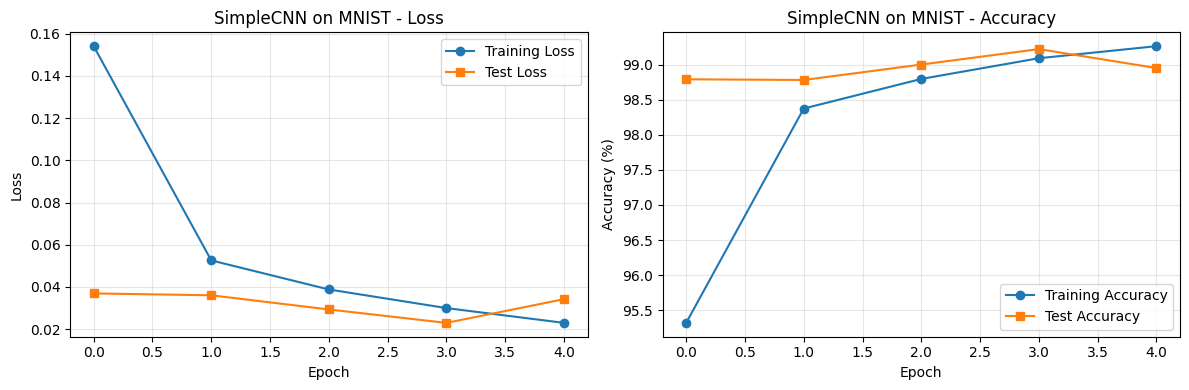

✅ Completed: SimpleCNN on MNIST

📊 Experiment 2/20
Model: SimpleCNN | Dataset: Fashion-MNIST
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 84.25%, Test Acc: 88.45%


Epoch 2: Train Acc: 89.78%, Test Acc: 90.52%


Epoch 3: Train Acc: 91.23%, Test Acc: 91.37%


Epoch 4: Train Acc: 92.24%, Test Acc: 91.66%


Epoch 5: Train Acc: 93.03%, Test Acc: 91.87%

✅ Training completed in 770.44 seconds
Final Training Accuracy: 93.03%
Final Test Accuracy: 91.87%


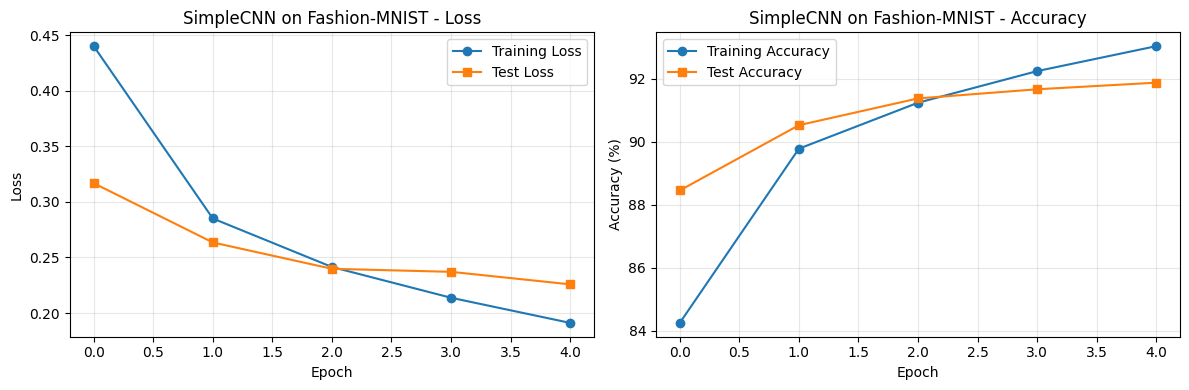

✅ Completed: SimpleCNN on Fashion-MNIST

📊 Experiment 3/20
Model: SimpleCNN | Dataset: CIFAR-10
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 48.38%, Test Acc: 62.74%


Epoch 2: Train Acc: 63.07%, Test Acc: 68.81%


Epoch 3: Train Acc: 67.85%, Test Acc: 72.73%


Epoch 4: Train Acc: 71.30%, Test Acc: 72.14%


Epoch 5: Train Acc: 73.31%, Test Acc: 74.40%

✅ Training completed in 849.55 seconds
Final Training Accuracy: 73.31%
Final Test Accuracy: 74.40%


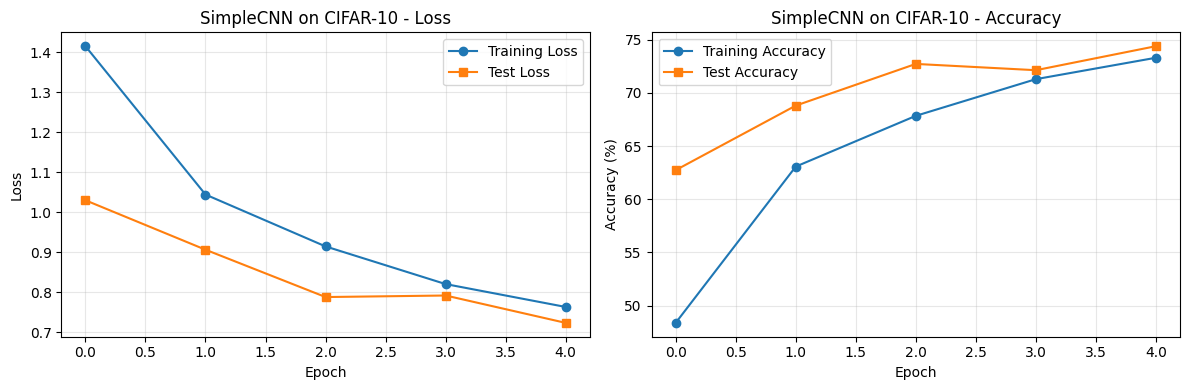

✅ Completed: SimpleCNN on CIFAR-10

📊 Experiment 4/20
Model: SimpleCNN | Dataset: SVHN
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 61.31%, Test Acc: 85.82%


Epoch 2: Train Acc: 78.79%, Test Acc: 88.61%


Epoch 3: Train Acc: 81.24%, Test Acc: 89.26%


Epoch 4: Train Acc: 83.21%, Test Acc: 89.93%


Epoch 5: Train Acc: 84.47%, Test Acc: 90.85%

✅ Training completed in 1346.11 seconds
Final Training Accuracy: 84.47%
Final Test Accuracy: 90.85%


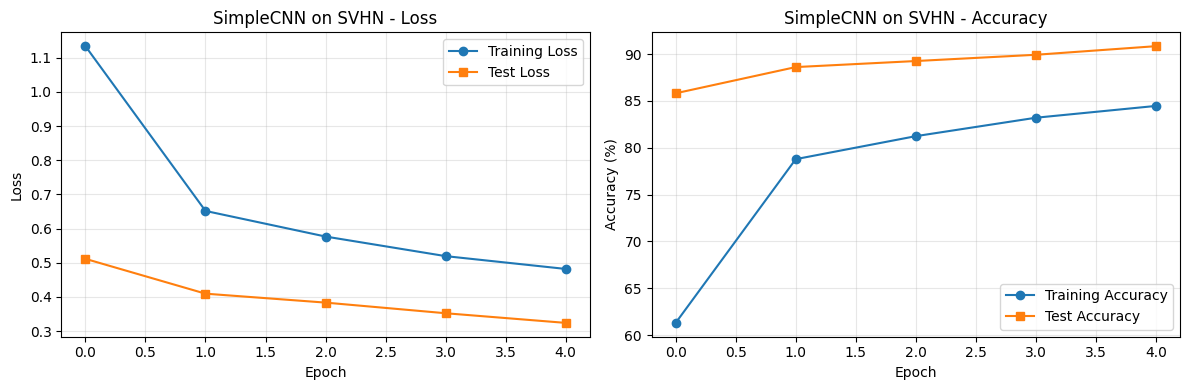

✅ Completed: SimpleCNN on SVHN

📊 Experiment 5/20
Model: SimpleCNN | Dataset: STL-10
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 29.96%, Test Acc: 41.77%


Epoch 2: Train Acc: 40.34%, Test Acc: 45.60%


Epoch 3: Train Acc: 45.22%, Test Acc: 48.45%


Epoch 4: Train Acc: 47.36%, Test Acc: 42.73%


Epoch 5: Train Acc: 47.60%, Test Acc: 51.71%

✅ Training completed in 159.31 seconds
Final Training Accuracy: 47.60%
Final Test Accuracy: 51.71%


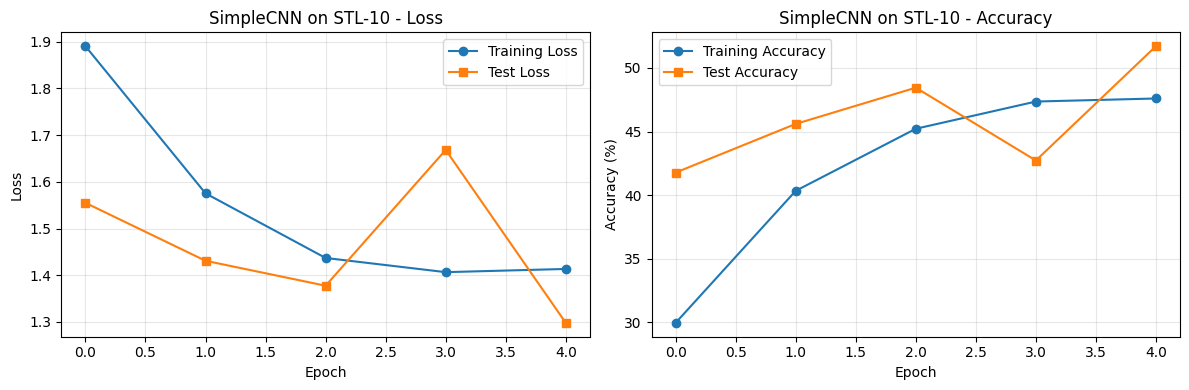

✅ Completed: SimpleCNN on STL-10

🤖 Testing DeepNeuralNetwork

📊 Experiment 6/20
Model: DeepNeuralNetwork | Dataset: MNIST
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 71.30%, Test Acc: 93.25%


Epoch 2: Train Acc: 91.22%, Test Acc: 95.26%


Epoch 3: Train Acc: 93.31%, Test Acc: 96.28%


Epoch 4: Train Acc: 94.26%, Test Acc: 96.31%


Epoch 5: Train Acc: 95.05%, Test Acc: 96.99%

✅ Training completed in 171.21 seconds
Final Training Accuracy: 95.05%
Final Test Accuracy: 96.99%


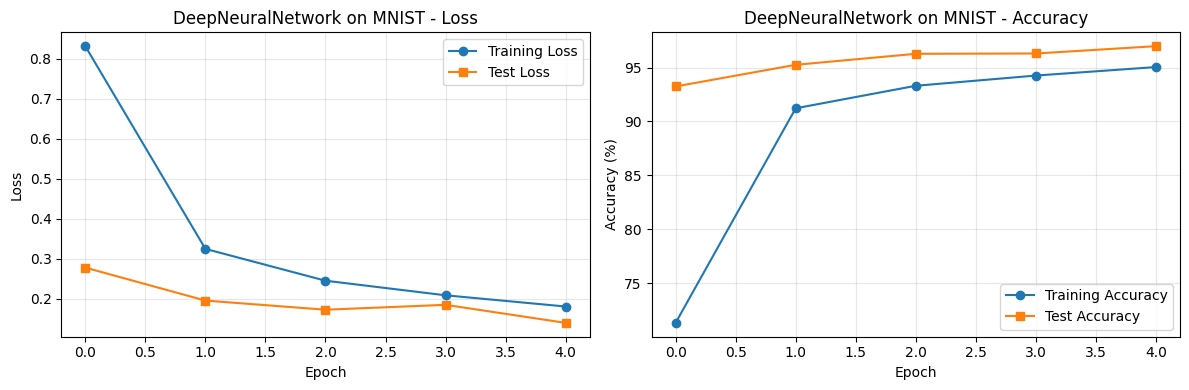

✅ Completed: DeepNeuralNetwork on MNIST

📊 Experiment 7/20
Model: DeepNeuralNetwork | Dataset: Fashion-MNIST
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 65.25%, Test Acc: 80.73%


Epoch 2: Train Acc: 79.64%, Test Acc: 84.32%


Epoch 3: Train Acc: 82.64%, Test Acc: 85.28%


Epoch 4: Train Acc: 83.91%, Test Acc: 84.50%


Epoch 5: Train Acc: 84.93%, Test Acc: 85.66%

✅ Training completed in 174.25 seconds
Final Training Accuracy: 84.93%
Final Test Accuracy: 85.66%


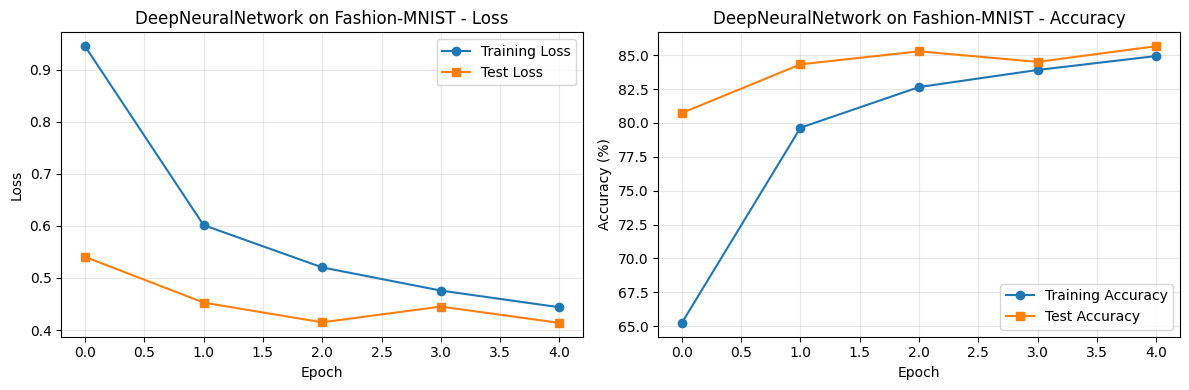

✅ Completed: DeepNeuralNetwork on Fashion-MNIST

📊 Experiment 8/20
Model: DeepNeuralNetwork | Dataset: CIFAR-10
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 22.30%, Test Acc: 32.57%


Epoch 2: Train Acc: 32.41%, Test Acc: 38.05%


Epoch 3: Train Acc: 37.57%, Test Acc: 40.52%


Epoch 4: Train Acc: 41.33%, Test Acc: 43.96%


Epoch 5: Train Acc: 44.32%, Test Acc: 44.48%

✅ Training completed in 203.22 seconds
Final Training Accuracy: 44.32%
Final Test Accuracy: 44.48%


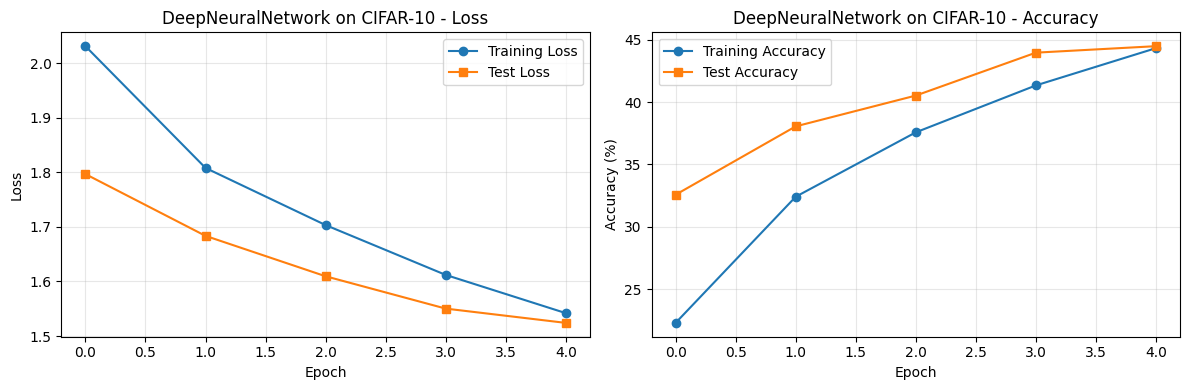

✅ Completed: DeepNeuralNetwork on CIFAR-10

📊 Experiment 9/20
Model: DeepNeuralNetwork | Dataset: SVHN
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 24.25%, Test Acc: 32.00%


Epoch 2: Train Acc: 45.13%, Test Acc: 54.14%


Epoch 3: Train Acc: 57.94%, Test Acc: 63.23%


Epoch 4: Train Acc: 66.81%, Test Acc: 69.80%


Epoch 5: Train Acc: 71.09%, Test Acc: 70.52%

✅ Training completed in 330.02 seconds
Final Training Accuracy: 71.09%
Final Test Accuracy: 70.52%


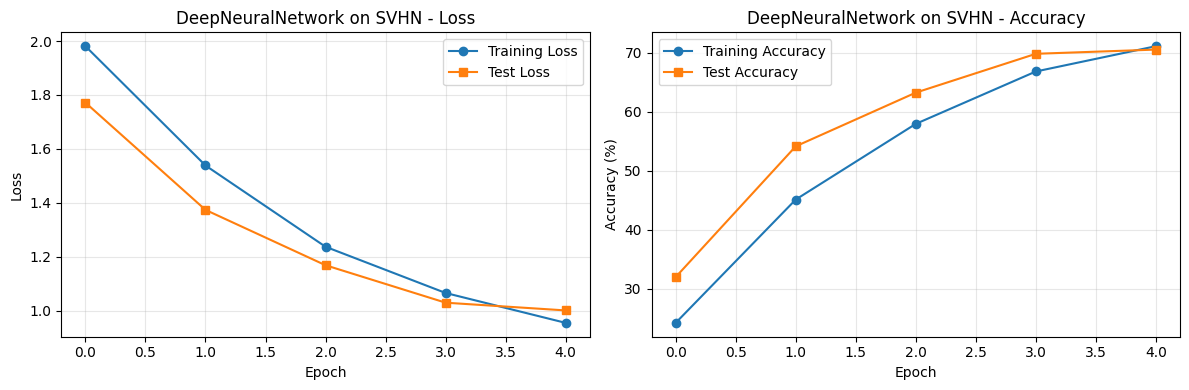

✅ Completed: DeepNeuralNetwork on SVHN

📊 Experiment 10/20
Model: DeepNeuralNetwork | Dataset: STL-10
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 17.76%, Test Acc: 23.02%


Epoch 2: Train Acc: 22.92%, Test Acc: 26.82%


Epoch 3: Train Acc: 25.04%, Test Acc: 27.21%


Epoch 4: Train Acc: 26.16%, Test Acc: 27.40%


Epoch 5: Train Acc: 26.04%, Test Acc: 28.41%

✅ Training completed in 63.84 seconds
Final Training Accuracy: 26.04%
Final Test Accuracy: 28.41%


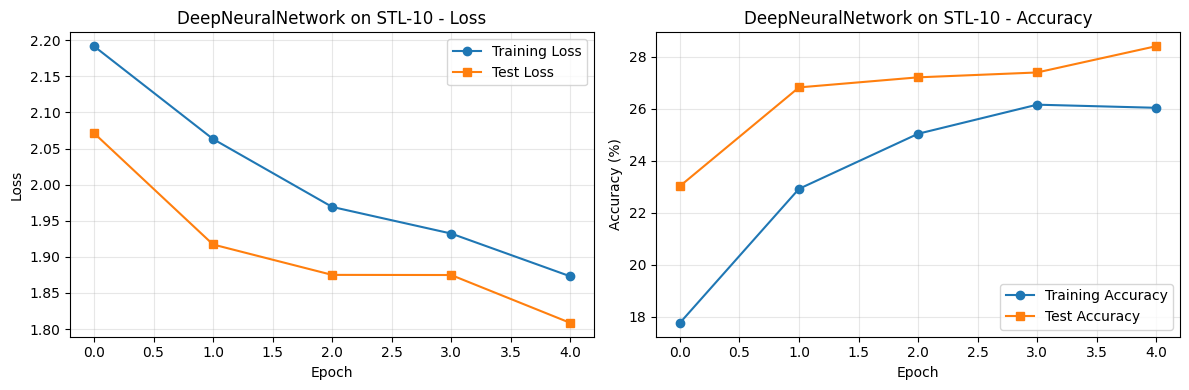

✅ Completed: DeepNeuralNetwork on STL-10

🤖 Testing LeNetStyleCNN

📊 Experiment 11/20
Model: LeNetStyleCNN | Dataset: MNIST
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 91.19%, Test Acc: 98.47%


Epoch 2: Train Acc: 97.85%, Test Acc: 98.57%


Epoch 3: Train Acc: 98.41%, Test Acc: 99.08%


Epoch 4: Train Acc: 98.70%, Test Acc: 99.18%


Epoch 5: Train Acc: 98.91%, Test Acc: 99.23%

✅ Training completed in 395.81 seconds
Final Training Accuracy: 98.91%
Final Test Accuracy: 99.23%


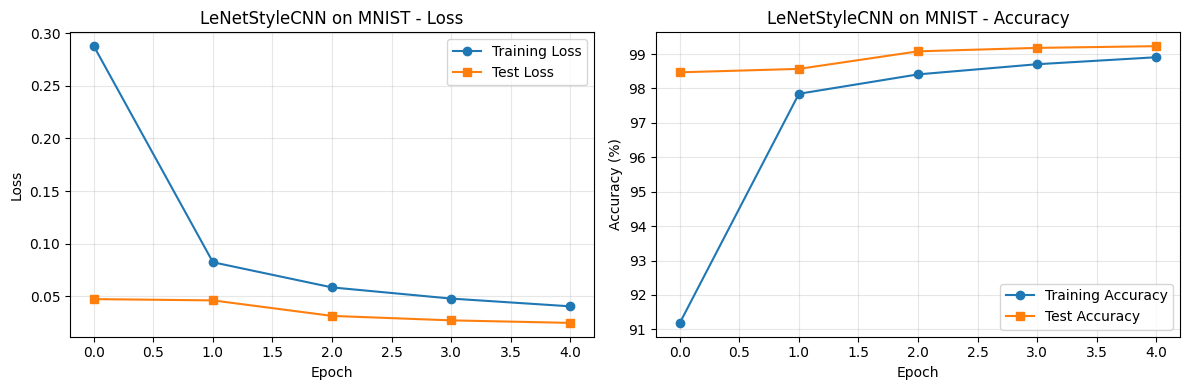

✅ Completed: LeNetStyleCNN on MNIST

📊 Experiment 12/20
Model: LeNetStyleCNN | Dataset: Fashion-MNIST
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 74.65%, Test Acc: 83.54%


Epoch 2: Train Acc: 85.39%, Test Acc: 87.40%


Epoch 3: Train Acc: 87.70%, Test Acc: 88.10%


Epoch 4: Train Acc: 88.83%, Test Acc: 89.46%


Epoch 5: Train Acc: 89.75%, Test Acc: 89.53%

✅ Training completed in 405.97 seconds
Final Training Accuracy: 89.75%
Final Test Accuracy: 89.53%


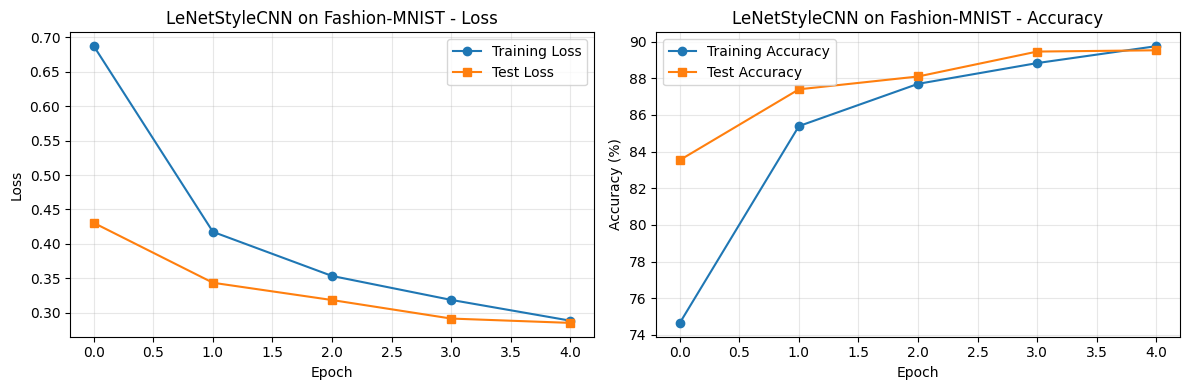

✅ Completed: LeNetStyleCNN on Fashion-MNIST

📊 Experiment 13/20
Model: LeNetStyleCNN | Dataset: CIFAR-10
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 38.68%, Test Acc: 49.99%


Epoch 2: Train Acc: 53.70%, Test Acc: 60.05%


Epoch 3: Train Acc: 59.63%, Test Acc: 64.22%


Epoch 4: Train Acc: 63.34%, Test Acc: 64.89%


Epoch 5: Train Acc: 66.19%, Test Acc: 67.49%

✅ Training completed in 426.52 seconds
Final Training Accuracy: 66.19%
Final Test Accuracy: 67.49%


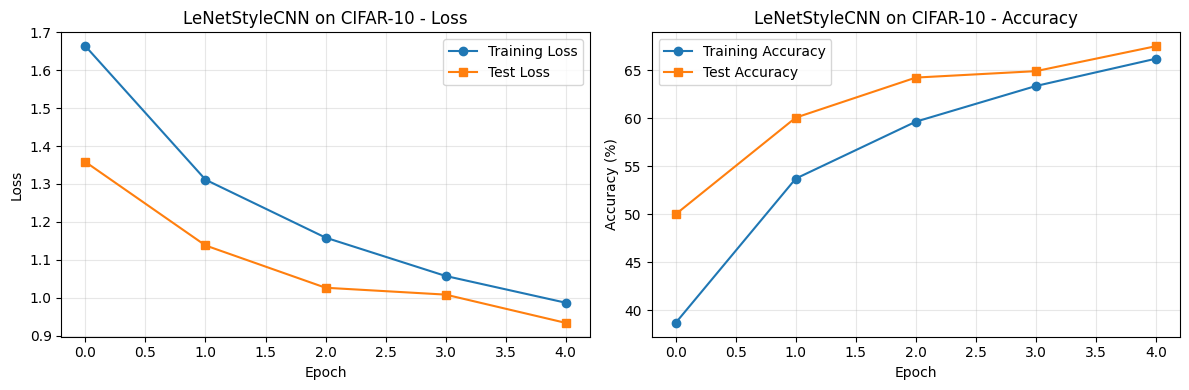

✅ Completed: LeNetStyleCNN on CIFAR-10

📊 Experiment 14/20
Model: LeNetStyleCNN | Dataset: SVHN
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 69.81%, Test Acc: 86.04%


Epoch 2: Train Acc: 86.30%, Test Acc: 88.00%


Epoch 3: Train Acc: 88.29%, Test Acc: 89.21%


Epoch 4: Train Acc: 89.58%, Test Acc: 89.97%


Epoch 5: Train Acc: 90.26%, Test Acc: 90.02%

✅ Training completed in 688.46 seconds
Final Training Accuracy: 90.26%
Final Test Accuracy: 90.02%


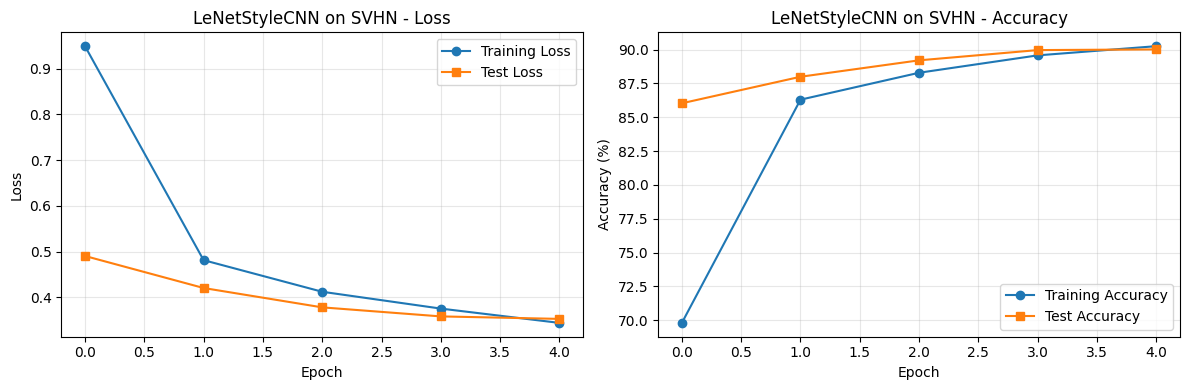

✅ Completed: LeNetStyleCNN on SVHN

📊 Experiment 15/20
Model: LeNetStyleCNN | Dataset: STL-10
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 18.28%, Test Acc: 30.09%


Epoch 2: Train Acc: 27.26%, Test Acc: 36.00%


Epoch 3: Train Acc: 32.10%, Test Acc: 37.23%


Epoch 4: Train Acc: 35.80%, Test Acc: 41.30%


Epoch 5: Train Acc: 38.70%, Test Acc: 42.02%

✅ Training completed in 98.96 seconds
Final Training Accuracy: 38.70%
Final Test Accuracy: 42.02%


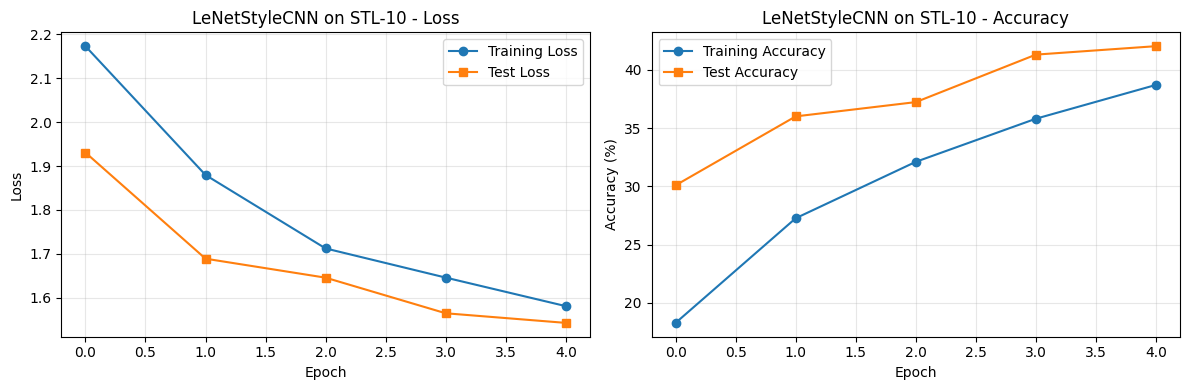

✅ Completed: LeNetStyleCNN on STL-10

🤖 Testing MiniResNet

📊 Experiment 16/20
Model: MiniResNet | Dataset: MNIST
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 77.52%, Test Acc: 96.27%


Epoch 2: Train Acc: 92.72%, Test Acc: 97.74%


Epoch 3: Train Acc: 94.64%, Test Acc: 98.24%


Epoch 4: Train Acc: 95.72%, Test Acc: 98.41%


Epoch 5: Train Acc: 96.32%, Test Acc: 98.74%

✅ Training completed in 1224.81 seconds
Final Training Accuracy: 96.32%
Final Test Accuracy: 98.74%


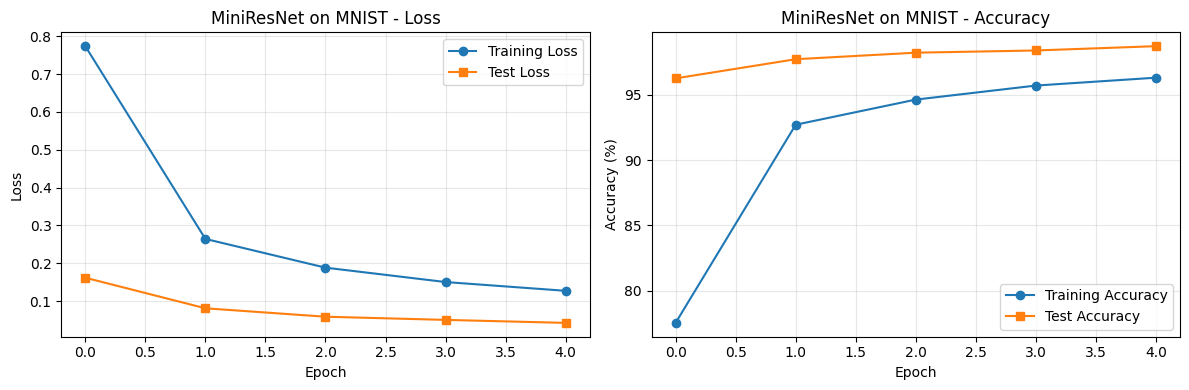

✅ Completed: MiniResNet on MNIST

📊 Experiment 17/20
Model: MiniResNet | Dataset: Fashion-MNIST
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 65.69%, Test Acc: 73.77%


Epoch 2: Train Acc: 77.82%, Test Acc: 82.16%


Epoch 3: Train Acc: 81.54%, Test Acc: 82.56%


Epoch 4: Train Acc: 83.59%, Test Acc: 85.83%


Epoch 5: Train Acc: 84.67%, Test Acc: 86.02%

✅ Training completed in 1209.12 seconds
Final Training Accuracy: 84.67%
Final Test Accuracy: 86.02%


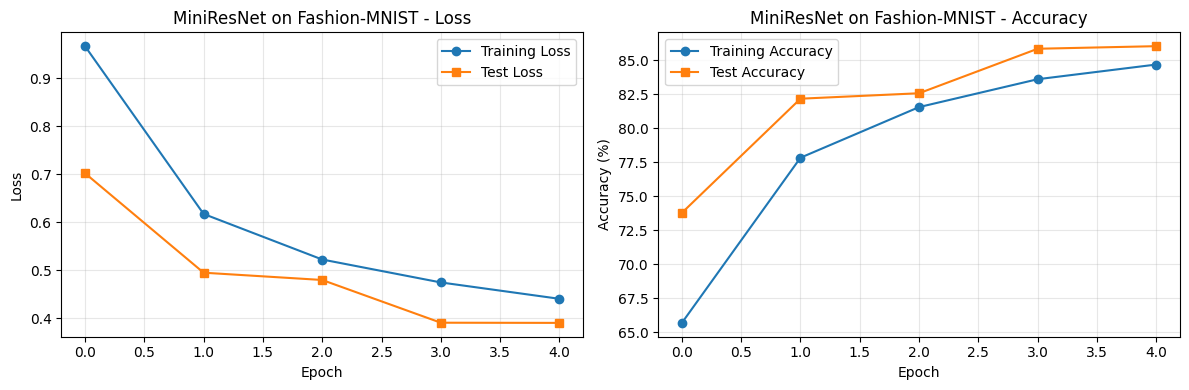

✅ Completed: MiniResNet on Fashion-MNIST

📊 Experiment 18/20
Model: MiniResNet | Dataset: CIFAR-10
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 32.26%, Test Acc: 39.20%


Epoch 2: Train Acc: 44.65%, Test Acc: 49.23%


Epoch 3: Train Acc: 50.14%, Test Acc: 58.67%


Epoch 4: Train Acc: 53.93%, Test Acc: 57.17%


Epoch 5: Train Acc: 56.84%, Test Acc: 62.03%

✅ Training completed in 1344.26 seconds
Final Training Accuracy: 56.84%
Final Test Accuracy: 62.03%


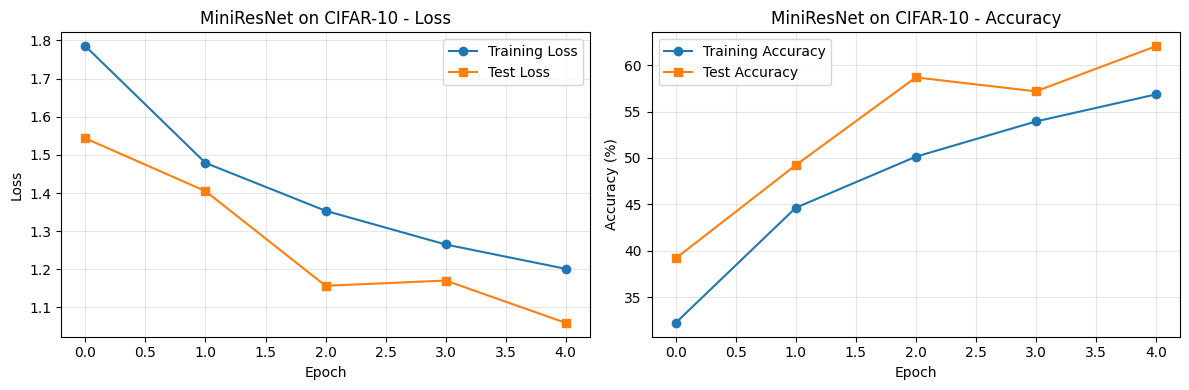

✅ Completed: MiniResNet on CIFAR-10

📊 Experiment 19/20
Model: MiniResNet | Dataset: SVHN
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 35.99%, Test Acc: 52.04%


Epoch 2: Train Acc: 65.47%, Test Acc: 80.91%


Epoch 3: Train Acc: 77.97%, Test Acc: 90.82%


Epoch 4: Train Acc: 82.94%, Test Acc: 91.20%


Epoch 5: Train Acc: 85.18%, Test Acc: 91.91%

✅ Training completed in 2009.83 seconds
Final Training Accuracy: 85.18%
Final Test Accuracy: 91.91%


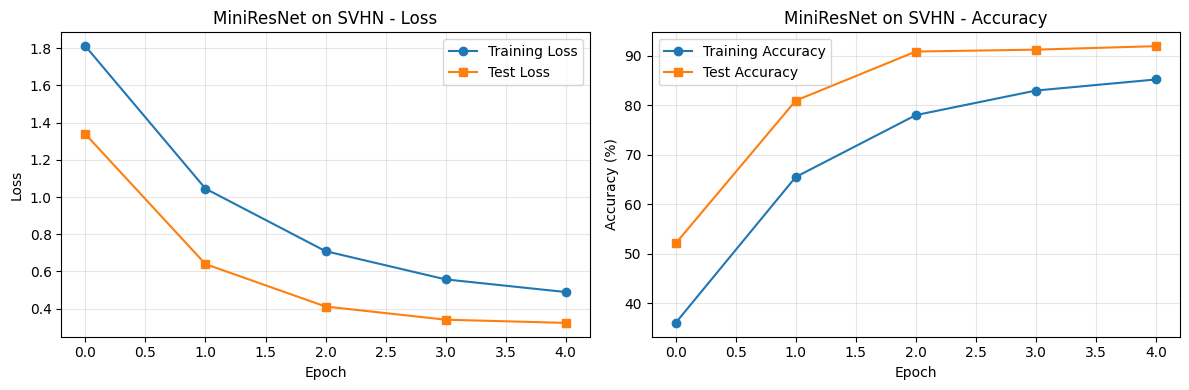

✅ Completed: MiniResNet on SVHN

📊 Experiment 20/20
Model: MiniResNet | Dataset: STL-10
--------------------------------------------------
Training for 5 epochs...


Epoch 1: Train Acc: 21.38%, Test Acc: 29.19%


Epoch 2: Train Acc: 25.92%, Test Acc: 31.95%


Epoch 3: Train Acc: 29.10%, Test Acc: 35.69%


Epoch 4: Train Acc: 30.08%, Test Acc: 36.85%


Epoch 5: Train Acc: 32.98%, Test Acc: 38.64%

✅ Training completed in 225.42 seconds
Final Training Accuracy: 32.98%
Final Test Accuracy: 38.64%


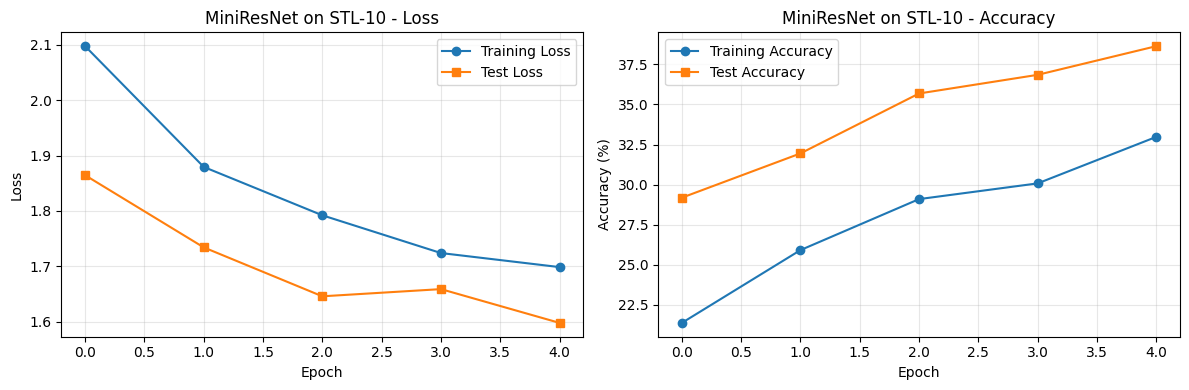

✅ Completed: MiniResNet on STL-10

🎉 All experiments completed!
Total time for all experiments: 12839.73 seconds


In [5]:
# Cell 6: Run All Experiments
# Experiment configuration
EPOCHS = 5  # You can increase this for better results
LEARNING_RATE = 0.001

# Results storage
results = []

print("🚀 Starting comprehensive neural network comparison!")
print(f"Training {len(models_info)} models on {len(datasets)} datasets")
print(f"Total experiments: {len(models_info) * len(datasets)}")
print("=" * 80)

# Counter for progress
experiment_count = 0
total_experiments = len(models_info) * len(datasets)

# Run all experiments
for model_name, model_class in models_info.items():
    print(f"\n🤖 Testing {model_name}")
    print("=" * 40)

    for dataset_name, dataset_info in datasets.items():
        experiment_count += 1

        print(f"\n📊 Experiment {experiment_count}/{total_experiments}")
        print(f"Model: {model_name} | Dataset: {dataset_name}")
        print("-" * 50)

        try:
            # Create model instance
            model = model_class(
                input_channels=dataset_info['input_channels'],
                num_classes=dataset_info['num_classes'],
                input_size=dataset_info['input_size']
            )

            # Train the model
            result = train_model(
                model=model,
                train_loader=dataset_info['train_loader'],
                test_loader=dataset_info['test_loader'],
                epochs=EPOCHS,
                lr=LEARNING_RATE
            )

            # Store results
            results.append({
                'Model': model_name,
                'Dataset': dataset_name,
                'Train_Accuracy': result['final_train_acc'],
                'Test_Accuracy': result['final_test_acc'],
                'Training_Time': result['training_time'],
                'Parameters': count_parameters(model)
            })

            # Plot training history
            plot_training_history(
                result['history'],
                f"{model_name} on {dataset_name}"
            )

            print(f"✅ Completed: {model_name} on {dataset_name}")

        except Exception as e:
            print(f"❌ Error with {model_name} on {dataset_name}: {str(e)}")
            # Store failed result
            results.append({
                'Model': model_name,
                'Dataset': dataset_name,
                'Train_Accuracy': 0.0,
                'Test_Accuracy': 0.0,
                'Training_Time': 0.0,
                'Parameters': 0
            })

print("\n🎉 All experiments completed!")
print(f"Total time for all experiments: {sum(r['Training_Time'] for r in results):.2f} seconds")

In [6]:
# Cell 7: Results Analysis and Visualization
# Create results DataFrame
results_df = pd.DataFrame(results)

print("📊 COMPREHENSIVE RESULTS TABLE")
print("=" * 80)

# Display full results table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Format the results for better display
display_df = results_df.copy()
display_df['Train_Accuracy'] = display_df['Train_Accuracy'].apply(lambda x: f"{x:.2f}%")
display_df['Test_Accuracy'] = display_df['Test_Accuracy'].apply(lambda x: f"{x:.2f}%")
display_df['Training_Time'] = display_df['Training_Time'].apply(lambda x: f"{x:.1f}s")
display_df['Parameters'] = display_df['Parameters'].apply(lambda x: f"{x:,}")

print(display_df.to_string(index=False))
print("\n" + "=" * 80)

# Create pivot tables for better visualization
print("\n📈 TEST ACCURACY COMPARISON TABLE")
print("=" * 50)

# Pivot table for test accuracy
accuracy_pivot = results_df.pivot(index='Model', columns='Dataset', values='Test_Accuracy')
print(accuracy_pivot.round(2))

print("\n⏱️ TRAINING TIME COMPARISON (seconds)")
print("=" * 50)

# Pivot table for training time
time_pivot = results_df.pivot(index='Model', columns='Dataset', values='Training_Time')
print(time_pivot.round(1))

📊 COMPREHENSIVE RESULTS TABLE
            Model       Dataset Train_Accuracy Test_Accuracy Training_Time Parameters
        SimpleCNN         MNIST         99.26%        98.95%        742.6s    390,858
        SimpleCNN Fashion-MNIST         93.03%        91.87%        770.4s    390,858
        SimpleCNN      CIFAR-10         73.31%        74.40%        849.6s    620,810
        SimpleCNN          SVHN         84.47%        90.85%       1346.1s    620,810
        SimpleCNN        STL-10         47.60%        51.71%        159.3s    620,810
DeepNeuralNetwork         MNIST         95.05%        96.99%        171.2s    664,330
DeepNeuralNetwork Fashion-MNIST         84.93%        85.66%        174.3s    664,330
DeepNeuralNetwork      CIFAR-10         44.32%        44.48%        203.2s  1,835,786
DeepNeuralNetwork          SVHN         71.09%        70.52%        330.0s  1,835,786
DeepNeuralNetwork        STL-10         26.04%        28.41%         63.8s  1,835,786
    LeNetStyleCNN       

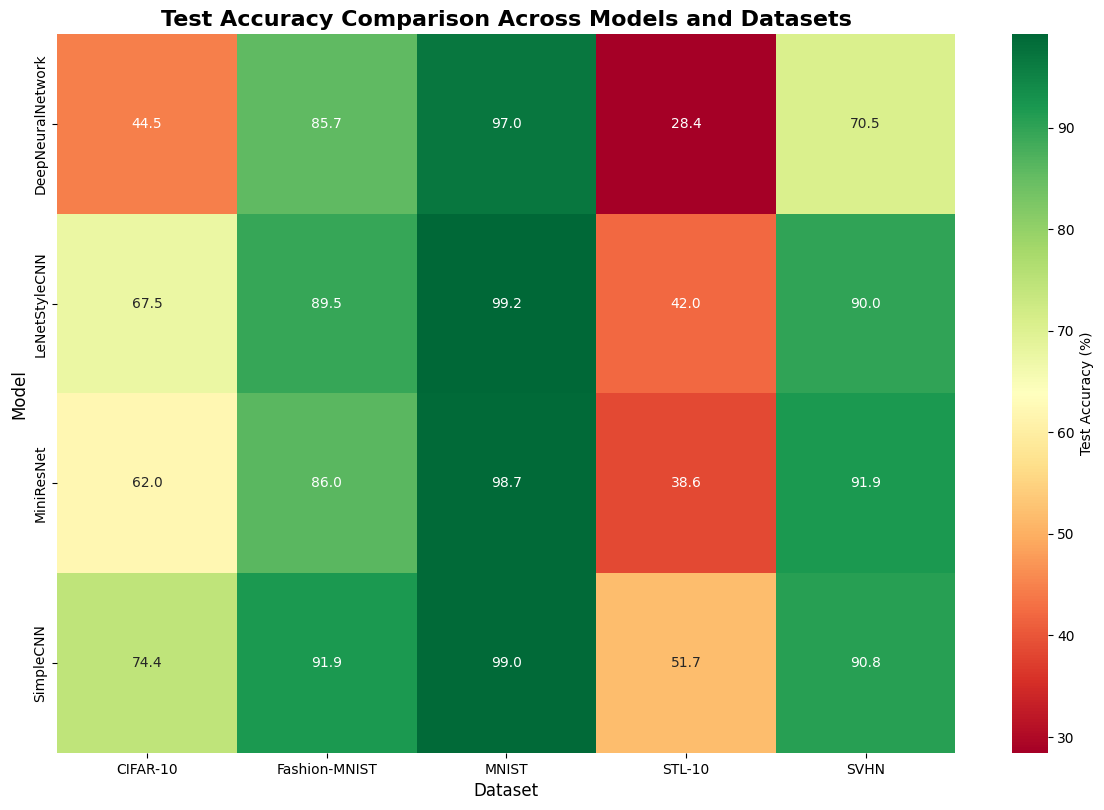

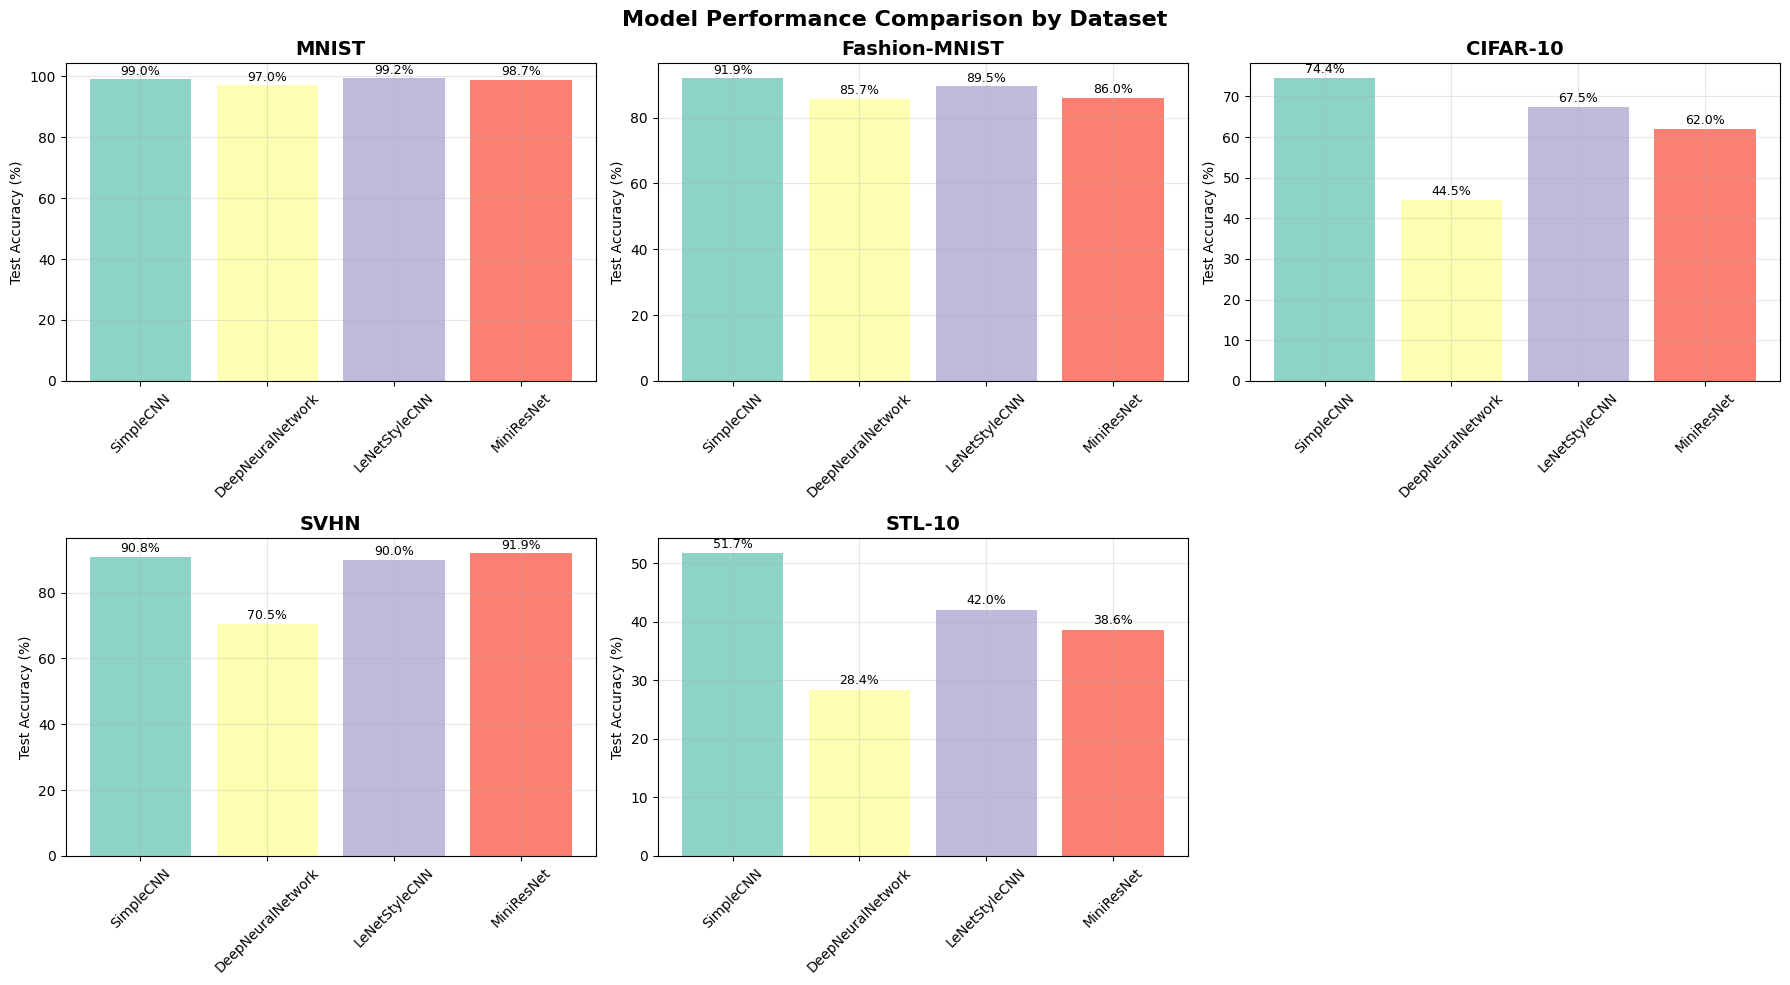

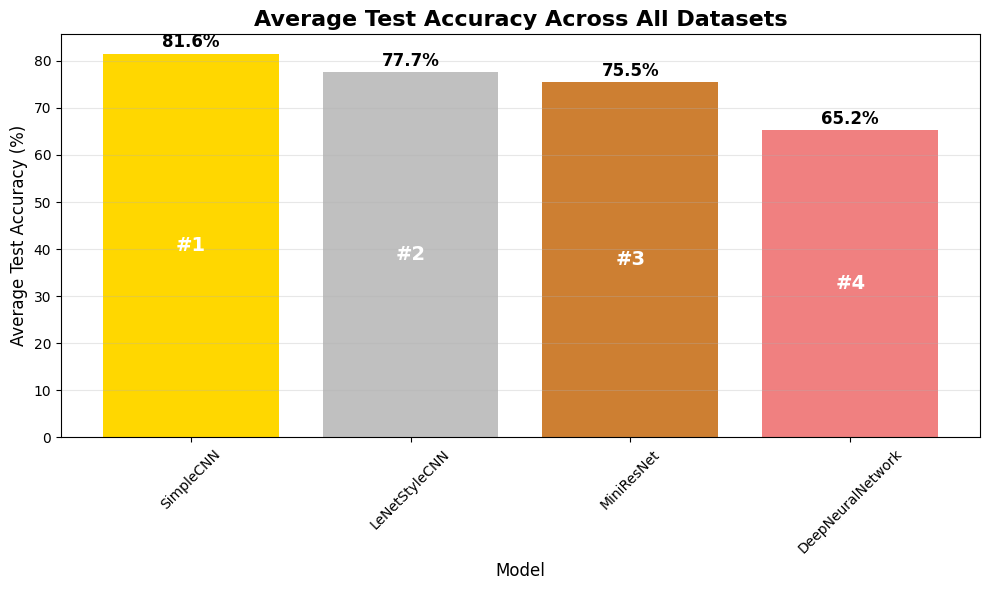

In [7]:
# Cell 8: Visualizations
# Create visualizations
plt.style.use('default')

# 1. Test Accuracy Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(accuracy_pivot, annot=True, cmap='RdYlGn', fmt='.1f',
            cbar_kws={'label': 'Test Accuracy (%)'}, square=True)
plt.title('Test Accuracy Comparison Across Models and Datasets', fontsize=16, fontweight='bold')
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Model Performance Bar Chart
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
datasets_list = list(datasets.keys())

for idx, dataset in enumerate(datasets_list):
    row = idx // 3
    col = idx % 3

    # Filter data for current dataset
    dataset_data = results_df[results_df['Dataset'] == dataset]

    # Create bar plot
    bars = axes[row, col].bar(dataset_data['Model'], dataset_data['Test_Accuracy'],
                             color=plt.cm.Set3(np.arange(len(dataset_data))))

    axes[row, col].set_title(f'{dataset}', fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel('Test Accuracy (%)', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, value in zip(bars, dataset_data['Test_Accuracy']):
        axes[row, col].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                           f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

# Remove the 6th subplot (since we only have 5 datasets)
fig.delaxes(axes[1, 2])

plt.suptitle('Model Performance Comparison by Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Overall Model Ranking
model_avg_accuracy = results_df.groupby('Model')['Test_Accuracy'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(model_avg_accuracy.index, model_avg_accuracy.values,
               color=['gold', 'silver', '#CD7F32', 'lightcoral'])  # Gold, Silver, Bronze, etc.
plt.title('Average Test Accuracy Across All Datasets', fontsize=16, fontweight='bold')
plt.ylabel('Average Test Accuracy (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars, model_avg_accuracy.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add ranking numbers
for i, (bar, model) in enumerate(zip(bars, model_avg_accuracy.index)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
             f'#{i+1}', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

In [8]:
# Cell 9: Statistical Analysis and Insights
# Statistical Analysis
print("📈 STATISTICAL ANALYSIS")
print("=" * 50)

# Best performing model for each dataset
print("🏆 BEST MODEL FOR EACH DATASET:")
for dataset in datasets.keys():
    dataset_results = results_df[results_df['Dataset'] == dataset]
    best_model = dataset_results.loc[dataset_results['Test_Accuracy'].idxmax()]
    print(f"{dataset:12} -> {best_model['Model']:15} ({best_model['Test_Accuracy']:.2f}%)")

print("\n🥇 OVERALL MODEL RANKINGS:")
for i, (model, avg_acc) in enumerate(model_avg_accuracy.items(), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
    print(f"{medal} #{i}: {model:15} - {avg_acc:.2f}% average")

# Model complexity vs performance
print("\n⚖️ MODEL COMPLEXITY vs PERFORMANCE:")
complexity_analysis = results_df.groupby('Model').agg({
    'Test_Accuracy': 'mean',
    'Parameters': 'first',
    'Training_Time': 'mean'
}).round(2)

complexity_analysis['Efficiency'] = complexity_analysis['Test_Accuracy'] / (complexity_analysis['Parameters'] / 1000)
complexity_analysis = complexity_analysis.sort_values('Efficiency', ascending=False)

print(complexity_analysis)

# Dataset difficulty ranking
print("\n📊 DATASET DIFFICULTY RANKING (by average accuracy):")
dataset_difficulty = results_df.groupby('Dataset')['Test_Accuracy'].mean().sort_values(ascending=False)
for i, (dataset, avg_acc) in enumerate(dataset_difficulty.items(), 1):
    difficulty = "Easy" if avg_acc > 80 else "Medium" if avg_acc > 60 else "Hard"
    print(f"#{i}: {dataset:12} - {avg_acc:.2f}% ({difficulty})")

📈 STATISTICAL ANALYSIS
🏆 BEST MODEL FOR EACH DATASET:
MNIST        -> LeNetStyleCNN   (99.23%)
Fashion-MNIST -> SimpleCNN       (91.87%)
CIFAR-10     -> SimpleCNN       (74.40%)
SVHN         -> MiniResNet      (91.91%)
STL-10       -> SimpleCNN       (51.71%)

🥇 OVERALL MODEL RANKINGS:
🥇 #1: SimpleCNN       - 81.56% average
🥈 #2: LeNetStyleCNN   - 77.66% average
🥉 #3: MiniResNet      - 75.47% average
   #4: DeepNeuralNetwork - 65.21% average

⚖️ MODEL COMPLEXITY vs PERFORMANCE:
                   Test_Accuracy  Parameters  Training_Time  Efficiency
Model                                                                  
MiniResNet                 75.47       42938        1202.69    1.757651
SimpleCNN                  81.56      390858         773.61    0.208669
LeNetStyleCNN              77.66      469004         403.14    0.165585
DeepNeuralNetwork          65.21      664330         188.51    0.098159

📊 DATASET DIFFICULTY RANKING (by average accuracy):
#1: MNIST        - 98.48% (Easy)

# Cell 10: Conclusions and Next Steps
"""
## 🎓 Key Insights and Learning Summary

### 🧠 NEURAL NETWORK ARCHITECTURE INSIGHTS:

🔍 **CNNs (Convolutional Neural Networks):**
• Best for image data due to spatial feature detection
• Use convolution + pooling to reduce dimensionality
• Great at detecting patterns, edges, and textures

🧮 **DNNs (Deep Neural Networks):**
• Simple fully-connected layers
• Treat images as flat vectors (lose spatial info)
• Good baseline but usually outperformed by CNNs

🏛️ **LeNet-Style CNNs:**
• Classic architecture from the 1990s
• Simple and effective for digit recognition
• Good balance of performance and simplicity

🔗 **ResNet-Style Networks:**
• Use skip connections to help training deep networks
• Solve vanishing gradient problem
• Can achieve better performance with proper training

### 📊 DATASET CHARACTERISTICS:

1. **MNIST**: Usually easiest - simple handwritten digits
2. **Fashion-MNIST**: More complex than MNIST - similar difficulty
3. **CIFAR-10**: Natural images - more challenging due to complexity
4. **SVHN**: Street numbers - moderate difficulty
5. **STL-10**: Larger images with more variation - challenging

### 🎯 KEY TAKEAWAYS:

1. **Architecture Matters**: CNNs generally outperform DNNs on image data
2. **Dataset Complexity**: More complex datasets require more sophisticated models
3. **Parameter Efficiency**: More parameters don't always mean better performance
4. **Training Time**: Complex models take longer but may give better results

### 🚀 NEXT STEPS TO IMPROVE:

1. **More Epochs**: Train for 20-50 epochs for better convergence
2. **Data Augmentation**: Add rotation, cropping, flipping
3. **Learning Rate Scheduling**: Reduce LR during training
4. **Regularization**: Add dropout, weight decay, batch normalization
5. **Transfer Learning**: Use pre-trained models as starting points
6. **Ensemble Methods**: Combine multiple models for better performance

### 🔧 EXPERIMENT SUGGESTIONS:

1. Try different optimizers (SGD, RMSprop, AdamW)
2. Experiment with different learning rates (0.01, 0.0001)
3. Add more complex architectures (VGG, ResNet, DenseNet)
4. Compare with and without data augmentation
5. Study the effect of different batch sizes
6. Implement early stopping to prevent overfitting

### 📚 EDUCATIONAL VALUE:

This notebook demonstrates:
- How to implement different neural network architectures
- Systematic comparison methodology
- Importance of proper evaluation metrics
- Visualization techniques for results analysis
- Best practices in deep learning experiments

**Happy Learning! 🎉**

Feel free to modify the code, try different parameters, and explore new architectures!
"""

print("🎉 Notebook completed successfully!")
print("Thank you for running this neural network comparison!")
print("Don't forget to experiment with different parameters and architectures! 🚀")